# DATA  VISUALISATION

### Done by:
         - Mohamed Fardeen
         - Mohamed Aslam
         - Mohamed Rashad
         - Safwan Faheen
         - Fayas Abubacker

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("DailyDelhiClimateTrain.csv")
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [3]:
df_test = pd.read_csv("DailyDelhiClimateTest.csv")
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [4]:
df = pd.concat([df_train, df_test], ignore_index=True)
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1571,2017-04-20,34.500000,27.500000,5.562500,998.625000
1572,2017-04-21,34.250000,39.375000,6.962500,999.875000
1573,2017-04-22,32.900000,40.900000,8.890000,1001.600000
1574,2017-04-23,32.875000,27.500000,9.962500,1002.125000


In [5]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

sns.set(style="whitegrid", palette="deep")


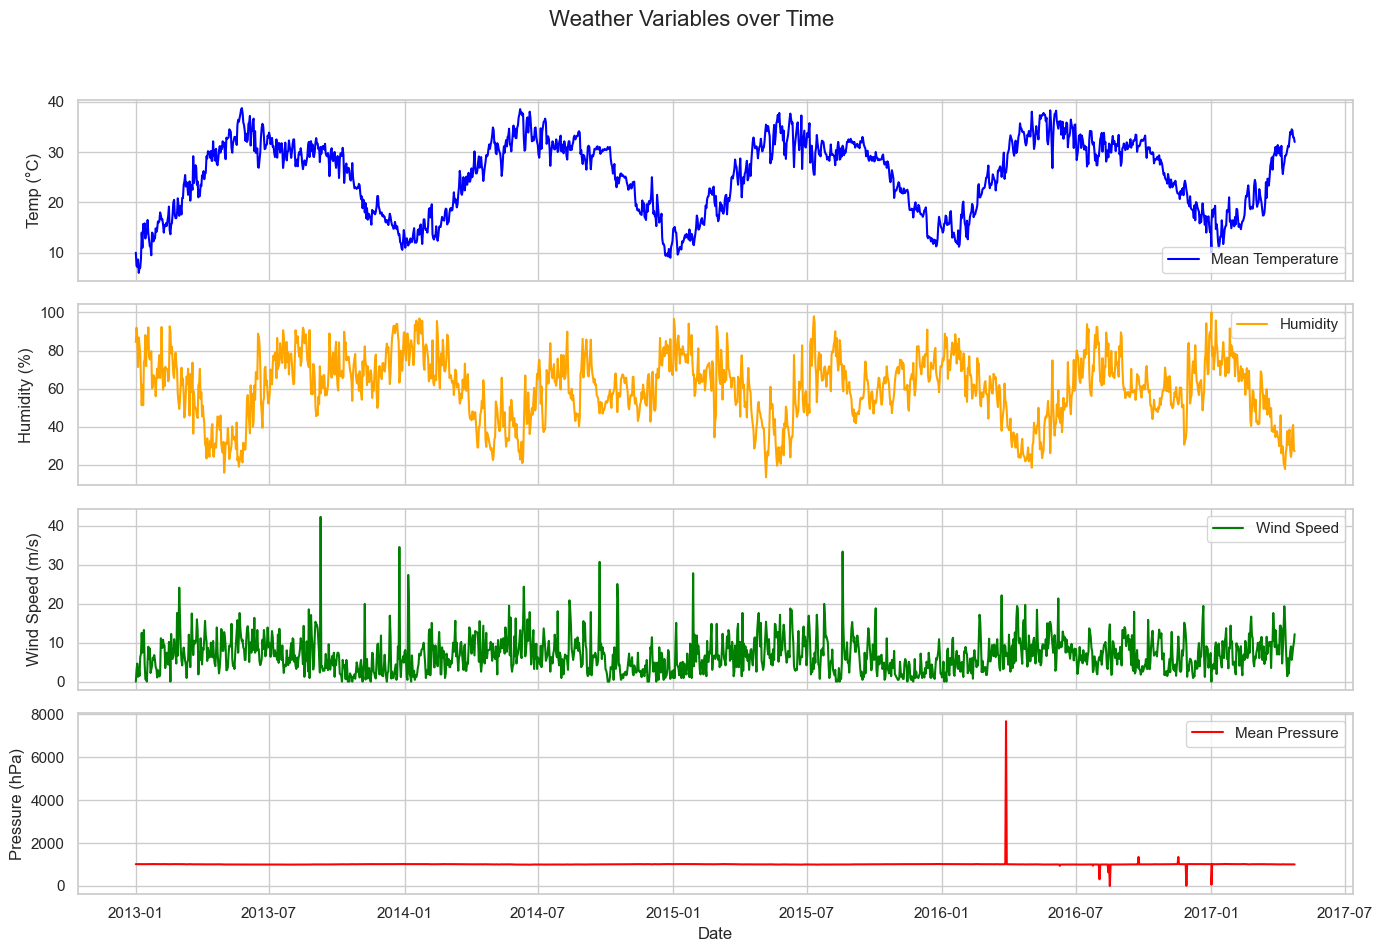

In [7]:
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

# Plot each variable
axs[0].plot(df['date'], df['meantemp'], color='blue', label='Mean Temperature')
axs[0].set_ylabel('Temp (°C)')
axs[0].legend()

axs[1].plot(df['date'], df['humidity'], color='orange', label='Humidity')
axs[1].set_ylabel('Humidity (%)')
axs[1].legend()

axs[2].plot(df['date'], df['wind_speed'], color='green', label='Wind Speed')
axs[2].set_ylabel('Wind Speed (m/s)')
axs[2].legend()

axs[3].plot(df['date'], df['meanpressure'], color='red', label='Mean Pressure')
axs[3].set_ylabel('Pressure (hPa)')
axs[3].set_xlabel('Date')
axs[3].legend()

plt.suptitle('Weather Variables over Time', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

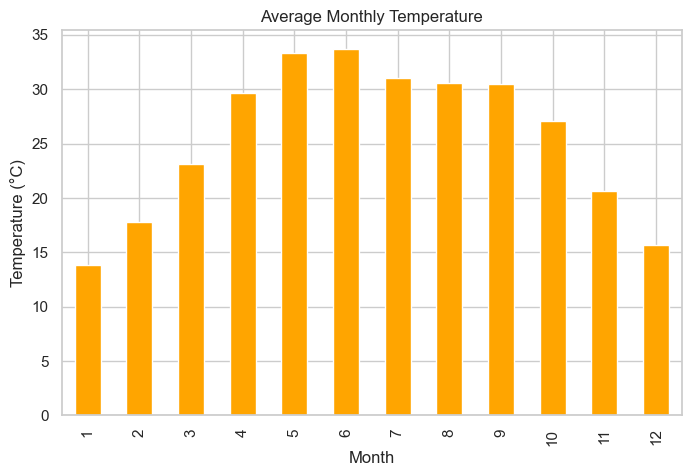

In [8]:
monthly_temp = df.groupby('month')['meantemp'].mean()

plt.figure(figsize=(8,5))
monthly_temp.plot(kind="bar", color="orange")
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()


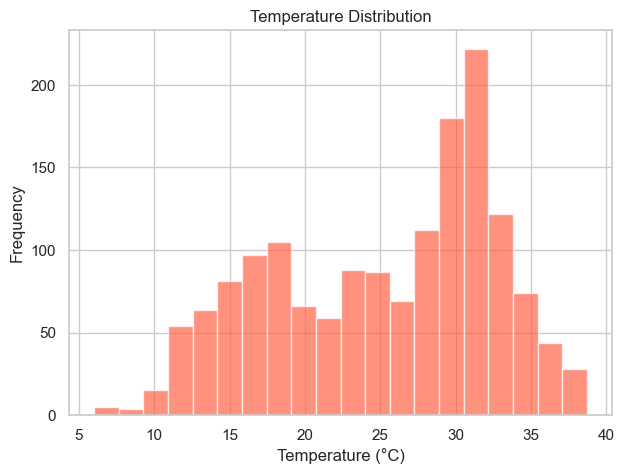

In [11]:
plt.figure(figsize=(7,5))
plt.hist(df['meantemp'], bins=20, color="tomato", alpha=0.7)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_1188\1261638586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="meantemp", data=df, palette="coolwarm")


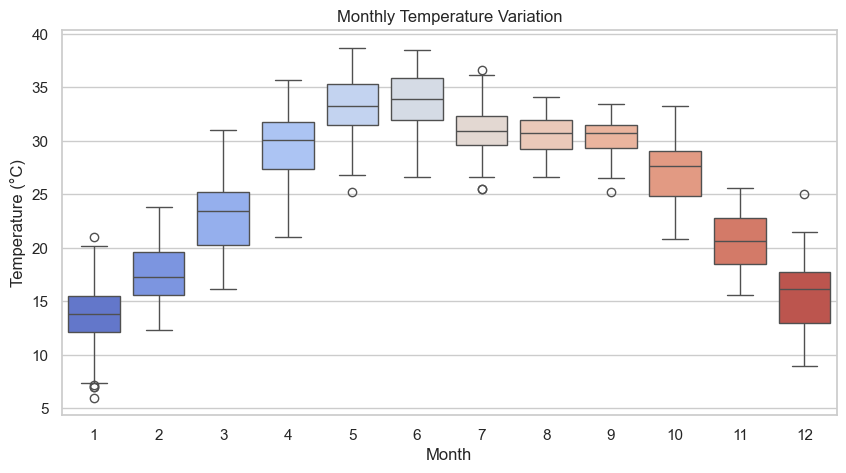

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x="month", y="meantemp", data=df, palette="coolwarm")
plt.title("Monthly Temperature Variation")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()


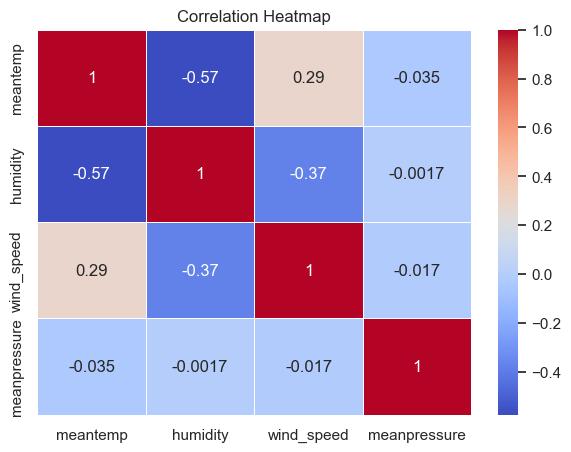

In [14]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['meantemp','humidity','wind_speed','meanpressure']].corr(), 
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


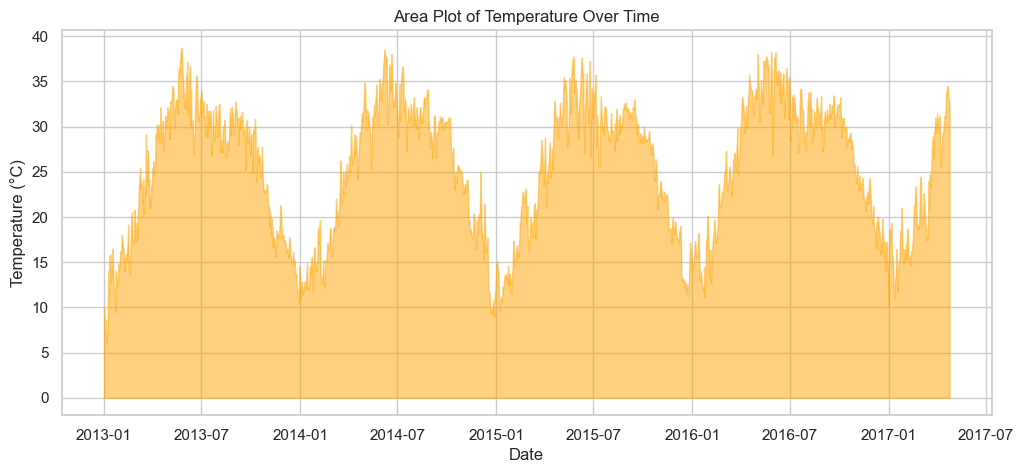

In [17]:
plt.figure(figsize=(12,5))
plt.fill_between(df['date'], df['meantemp'], color="orange", alpha=0.5)
plt.title("Area Plot of Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_1188\3059023802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="month", y="humidity", data=df, palette="Set2")


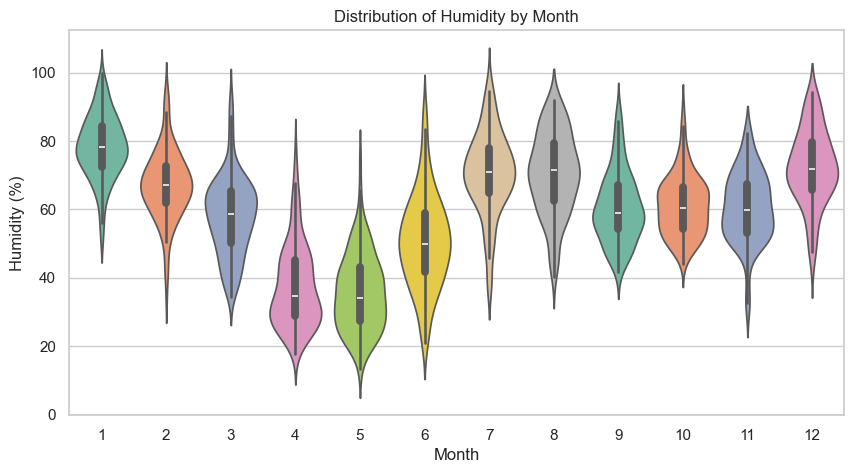

In [18]:
plt.figure(figsize=(10,5))
sns.violinplot(x="month", y="humidity", data=df, palette="Set2")
plt.title("Distribution of Humidity by Month")
plt.xlabel("Month")
plt.ylabel("Humidity (%)")
plt.show()


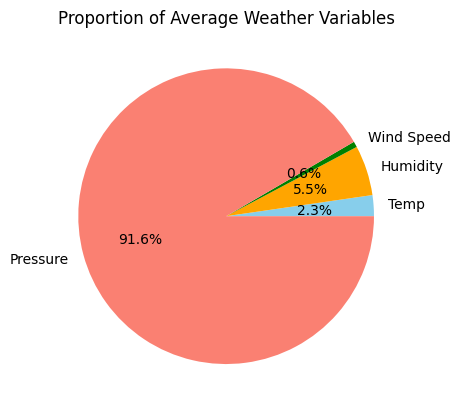

In [31]:
plt.pie(means, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'orange', 'green', 'salmon'])
plt.title('Proportion of Average Weather Variables')
plt.show()

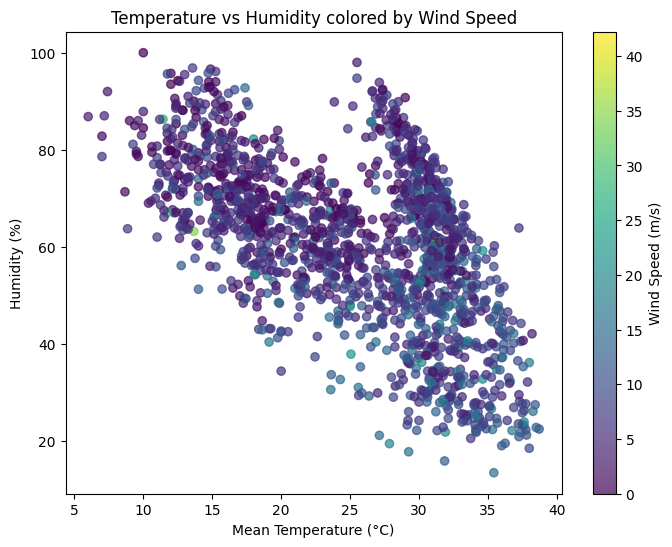

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(df['meantemp'], df['humidity'], c=df['wind_speed'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('Mean Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs Humidity colored by Wind Speed')
plt.show()

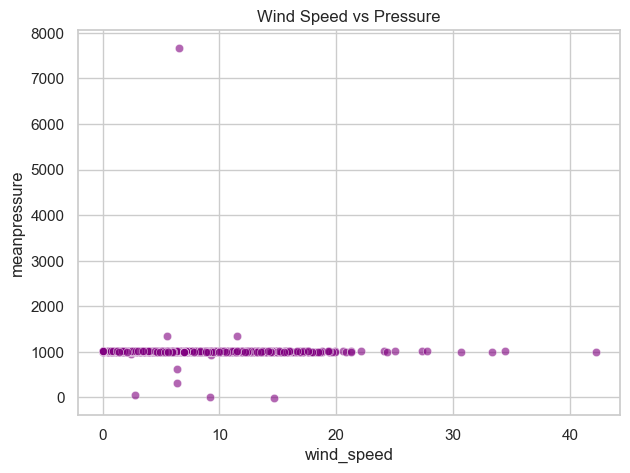

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="wind_speed", y="meanpressure", data=df, alpha=0.6, color="purple")
plt.title("Wind Speed vs Pressure")
plt.show()


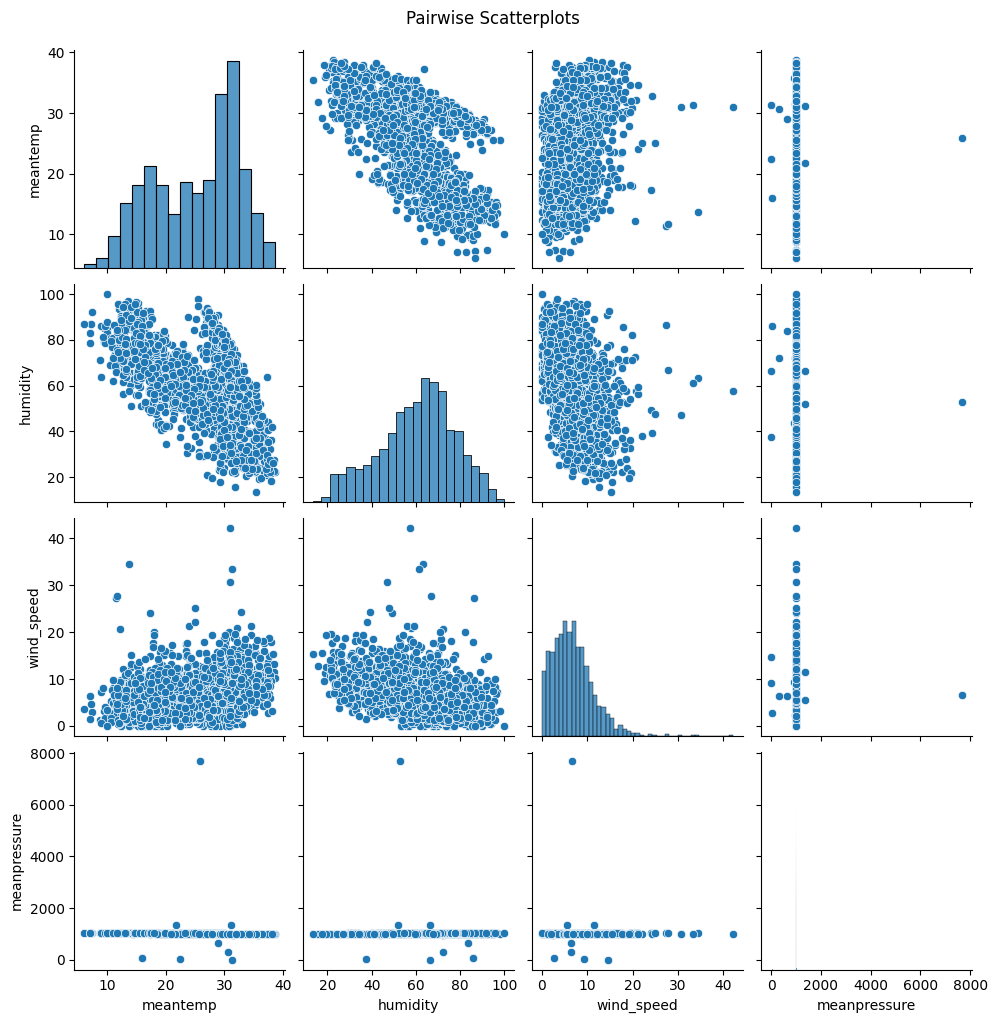

In [35]:
import seaborn as sns

sns.pairplot(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']])
plt.suptitle('Pairwise Scatterplots', y=1.02)
plt.show()